In [1]:
import numpy as np
import pandas as pd
import cython as ch
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1-Data Exploration

In [2]:
#lets import the crime data and print them
covid19=pd.read_csv('covid19.csv')
print(covid19.shape)

(23688, 5)


In [3]:
#lets see the data
print(covid19.head(5))

         Date      Country  Confirmed  Recovered  Deaths
0  2020-01-22  Afghanistan          0          0       0
1  2020-01-22      Albania          0          0       0
2  2020-01-22      Algeria          0          0       0
3  2020-01-22      Andorra          0          0       0
4  2020-01-22       Angola          0          0       0


In [4]:
#lets check is there any null value for any state
covid19.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [5]:
#lets check the description od data
covid19.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


# 2-Data Visualization

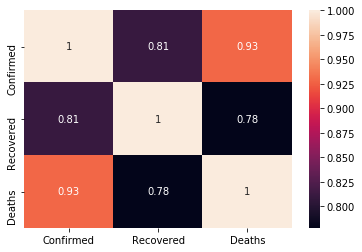

In [6]:
#lets plot the corelation of covid dataset
sns.heatmap(covid19.corr(),annot=True)

In [7]:
#lets see the top 10 countries where number of cases are more

top_cases=covid19[['Confirmed','Recovered','Deaths','Country']].groupby('Country').sum().sort_values('Confirmed',ascending=False).head(10)
top_cases=top_cases.reset_index()
top_cases

,Country,Confirmed,Recovered,Deaths
0,US,57098767,8428678,3221969
1,Italy,11896347,4354815,1568276
2,Spain,11890691,5770271,1302010
3,United Kingdom,9150537,43829,1329006
4,Germany,9046257,6102898,319666
5,China,8871610,6776464,384657
6,France,8746538,2519190,1209634
7,Russia,7459042,1586423,70758
8,Brazil,6701409,2666743,438199
9,Turkey,5868751,2895790,152495


In [73]:
#lets see the India's total number of cases

covid19India=covid19.loc[covid19['Country']=='India']
top_cases_India=covid19India[['Confirmed','Recovered','Deaths','Country']].groupby('Country').sum().sort_values('Confirmed',ascending=False).head(10)
top_cases_India=top_cases_India.reset_index()
top_cases_India

,Country,Confirmed,Recovered,Deaths
0,India,2677040,903541,83979


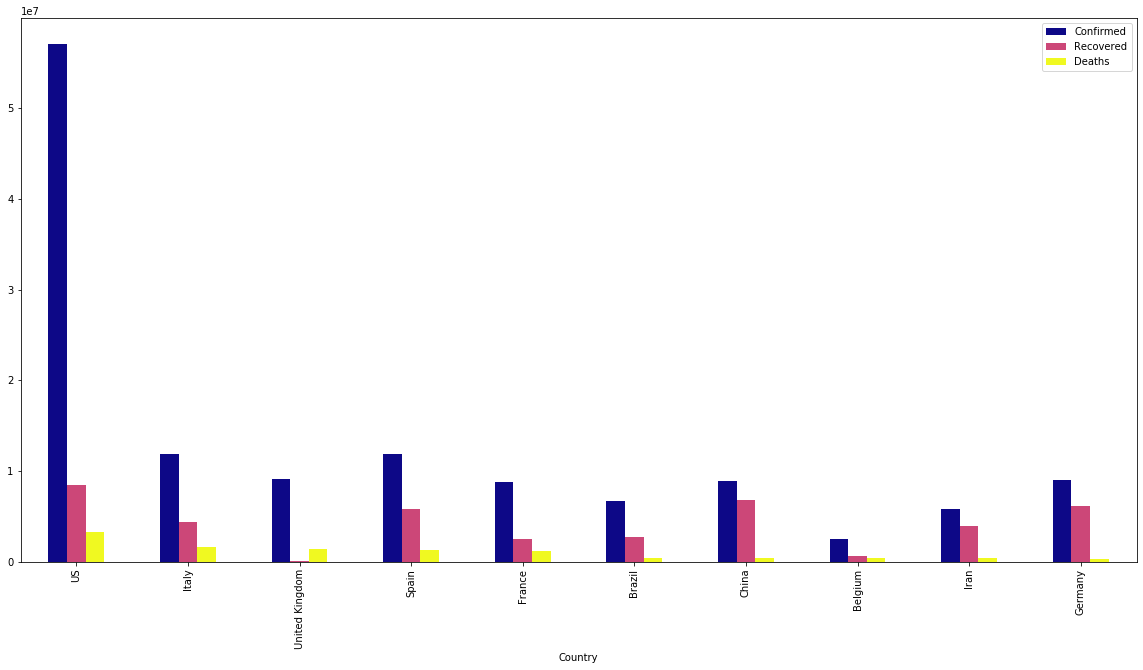

In [9]:
#lets see the top 10 countries data in bar graph
top_cases=covid19[['Confirmed','Recovered','Deaths','Country']].groupby('Country').sum().sort_values('Deaths',ascending=False).head(10)
top_cases.plot(kind='bar',width=0.5,colormap='plasma',figsize=(20,10))
plt.show()

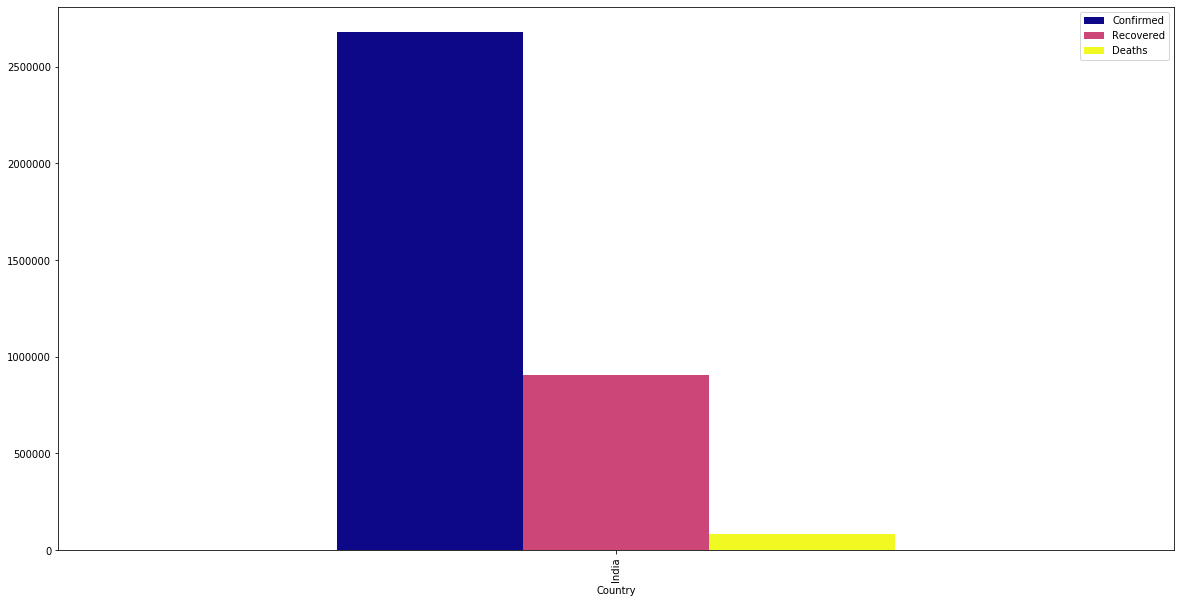

In [10]:
#lets see bar graph of total cases in India
top_cases_India=covid19India[['Confirmed','Recovered','Deaths','Country']].groupby('Country').sum().sort_values('Deaths',ascending=False).head(10)
top_cases_India.plot(kind='bar',width=0.5,colormap='plasma',figsize=(20,10))
plt.show()

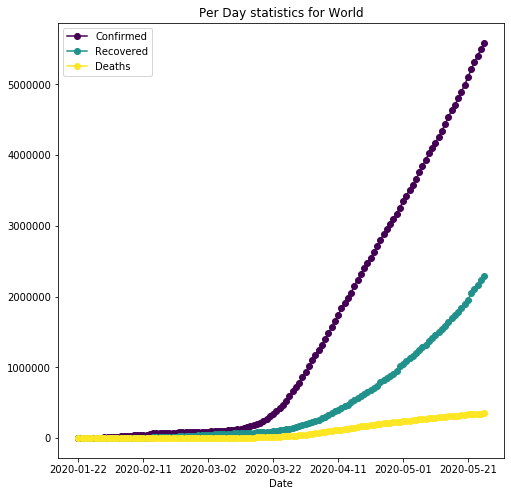

In [11]:
#lets see the exponential curve of worldwide covid19 cases
num_plot = covid19.groupby('Date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot.plot(figsize=(8,8),title='Per Day statistics for World',colormap='viridis',marker='o')
plt.show()

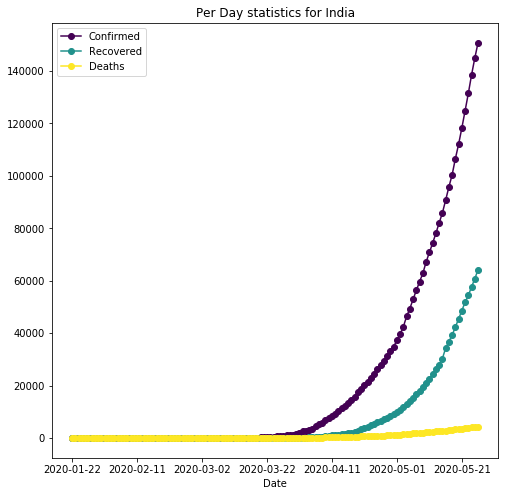

In [12]:
#lets see the exponential curve of India's covid19 cases
num_plot = covid19India.groupby('Date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot.plot(figsize=(8,8),title='Per Day statistics for India',colormap='viridis',marker='o')
plt.show()

# 3-Predicting/Forecasting Total Number of Cases for Worldwide including India

Here i am going to generate the data till July end i.e. for 65days ahead (as the data contain last date is 26th may) of forecast of COVID-19.
I wil use Prophet method for prediction.

Prophet is open source software released by Facebook’s Core Data Science team. 
It is available for download on CRAN and PyPI.

Will use Prophet, a procedure for forecasting time series data based on an additive model 
where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. 
It works best with time series that have strong seasonal effects and several seasons of historical data. 
Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

The input to Prophet is always a data frame with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric and represents the measurement we wish to forecast.

In [25]:
#install fbprophet
#$ pip install fbprophet
#conda install -c conda-forge fbprophet
#pip install fbprophet

In [26]:
#import the prophet library
from fbprophet import Prophet

In [27]:
#split the data on the basis of Confirmed, Recovered and Deaths
confirmed = covid19.groupby('Date').sum()['Confirmed'].reset_index()
recovered = covid19.groupby('Date').sum()['Recovered'].reset_index()
deaths = covid19.groupby('Date').sum()['Deaths'].reset_index()

In [39]:
#Forecasting Confirmed COVID19 Cases Worldwide
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])
print(confirmed.tail())
m = Prophet(interval_width=0.95) 
m.fit(confirmed) 
future_confirmed = m.make_future_dataframe(periods=65) 
print(future_confirmed.tail())

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds        y
121 2020-05-22  5210817
122 2020-05-23  5310362
123 2020-05-24  5407613
124 2020-05-25  5495061
125 2020-05-26  5589626
            ds
186 2020-07-26
187 2020-07-27
188 2020-07-28
189 2020-07-29
190 2020-07-30


In [46]:
#predicting the future confirmed cases with date, and upper and lower limit of y value
forecast_confirmed = m.predict(future_confirmed)
forecast_confirmed[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
186,2020-07-26,638480.198823,521495.367921,772589.502425
187,2020-07-27,642471.915838,521199.211292,778602.509085
188,2020-07-28,647339.662144,523479.895725,786964.251928
189,2020-07-29,652624.267507,526217.639703,794133.932062
190,2020-07-30,657492.462133,527630.745942,804160.897769


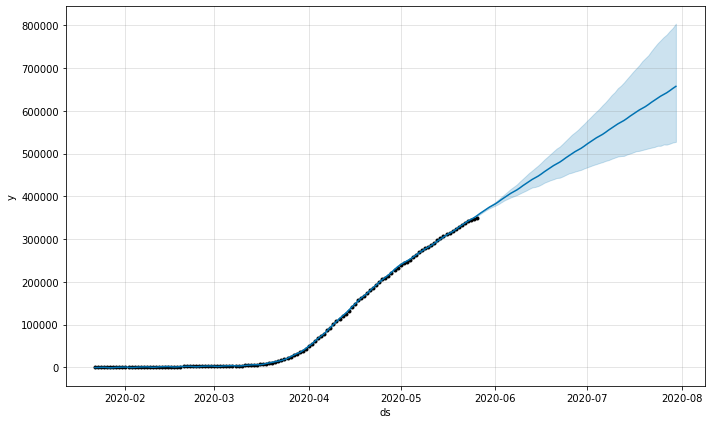

In [47]:
#lets plot the predicted model
confirmed_forecast_plot = m.plot(forecast_confirmed)

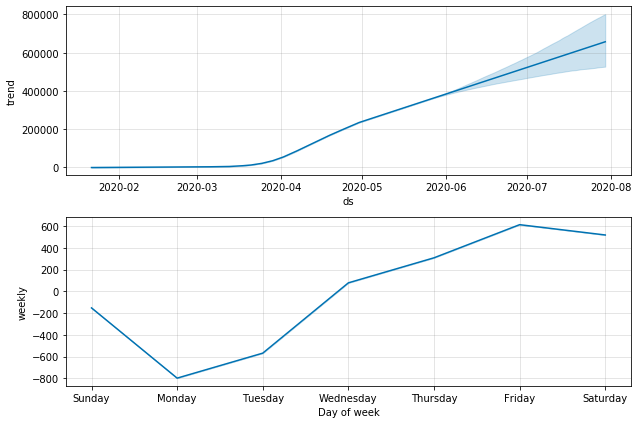

In [48]:
#lets print the components of the plot
confirmed_forecast_plot =m.plot_components(forecast_confirmed)

In [49]:
#Forecasting Worldwide COVID19 Deaths Cases
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])
print(deaths.tail())
m = Prophet(interval_width=0.95)
m.fit(deaths)
future_deaths = m.make_future_dataframe(periods=65)
print(future_deaths.tail())

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds       y
121 2020-05-22  338160
122 2020-05-23  342097
123 2020-05-24  345059
124 2020-05-25  346232
125 2020-05-26  350453
            ds
186 2020-07-26
187 2020-07-27
188 2020-07-28
189 2020-07-29
190 2020-07-30


In [50]:
#predicting the future death acses with date, and upper and lower limit of y value
forecast_deaths = m.predict(future_deaths)
forecast_deaths[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
186,2020-07-26,638480.198823,517841.532421,751884.587839
187,2020-07-27,642471.915838,518759.575593,758593.253881
188,2020-07-28,647339.662144,521422.047562,766655.347041
189,2020-07-29,652624.267507,523608.380246,774798.887545
190,2020-07-30,657492.462133,523326.952253,783488.062581


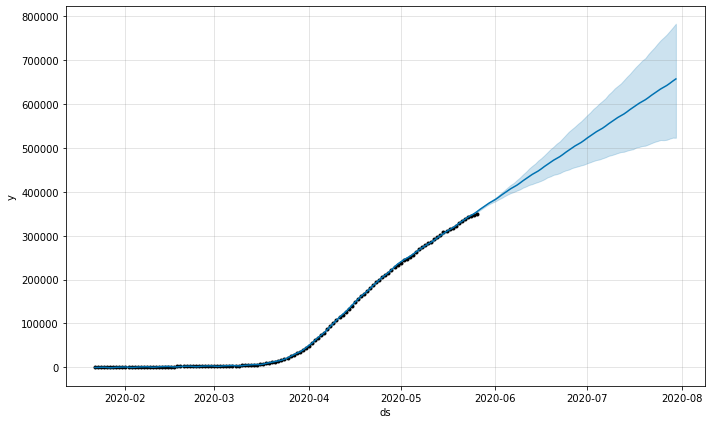

In [51]:
#lets plot the predicted model
deaths_forecast_plot = m.plot(forecast_deaths)

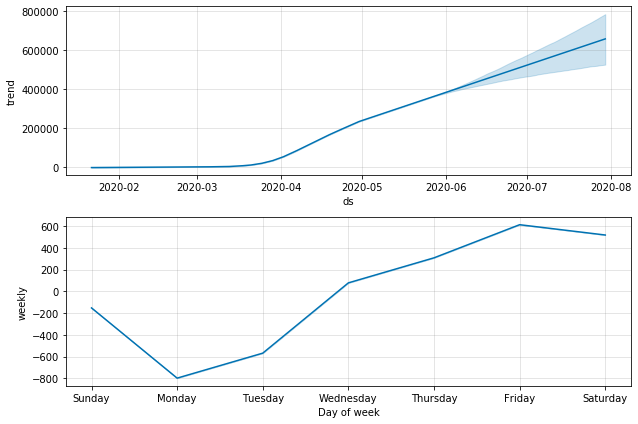

In [52]:
#lets print the components of the plot
deaths_forecast_plot =m.plot_components(forecast_deaths)

In [53]:
#Forecasting Worldwide COVID19 Recovered Cases
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])
print(recovered.tail())
m = Prophet(interval_width=0.95)
m.fit(recovered)
future_recovered = m.make_future_dataframe(periods=65)
print(future_recovered.tail())

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds        y
121 2020-05-22  2056643
122 2020-05-23  2112185
123 2020-05-24  2168563
124 2020-05-25  2231738
125 2020-05-26  2286956
            ds
186 2020-07-26
187 2020-07-27
188 2020-07-28
189 2020-07-29
190 2020-07-30


In [55]:
#predicting the future recovered acses with date, and upper and lower limit of y value
forecast_recovered = m.predict(future_recovered)
forecast_recovered[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
186,2020-07-26,5.132617e+06,4.456521e+06,5.846500e+06
187,2020-07-27,5.180043e+06,4.473150e+06,5.911024e+06
188,2020-07-28,5.227904e+06,4.512845e+06,5.971505e+06
189,2020-07-29,5.274029e+06,4.532140e+06,6.039942e+06
190,2020-07-30,5.323231e+06,4.576305e+06,6.082305e+06


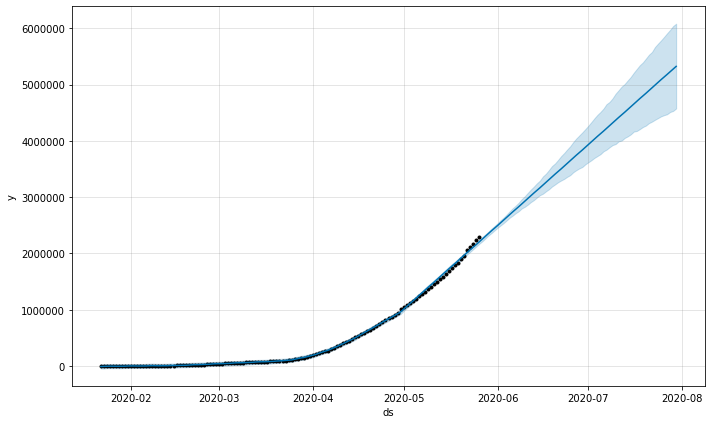

In [56]:
#lets plot the predicted model
recovered_forecast_plot = m.plot(forecast_recovered)

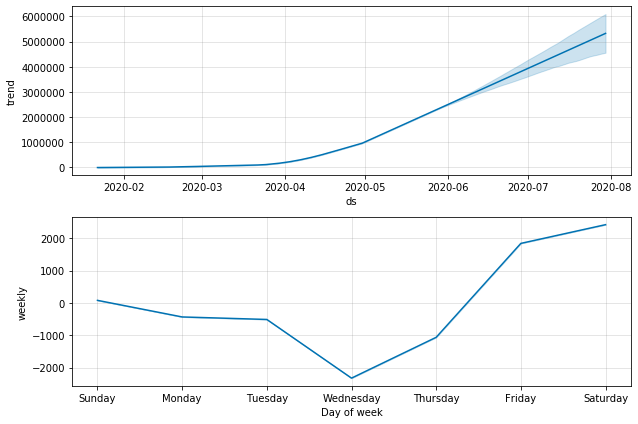

In [57]:
#lets print the components of the plot
recovered_forecast_plot =m.plot_components(forecast_recovered)

# 4-Predicting/Forecasting Total Number of Cases for India

In [58]:
#split the data on the basis of Confirmed, Recovered and Deaths
confirmed_India = covid19India.groupby('Date').sum()['Confirmed'].reset_index()
recovered_India = covid19India.groupby('Date').sum()['Recovered'].reset_index()
deaths_India = covid19India.groupby('Date').sum()['Deaths'].reset_index()

In [59]:
#Forecasting Confirmed COVID19 Cases in India
confirmed_India.columns = ['ds','y']
confirmed_India['ds'] = pd.to_datetime(confirmed_India['ds'])
print(confirmed_India.tail())
m = Prophet(interval_width=0.95) 
m.fit(confirmed_India) 
future_confirmed_India = m.make_future_dataframe(periods=65) 
print(future_confirmed_India.tail())

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds       y
121 2020-05-22  124794
122 2020-05-23  131423
123 2020-05-24  138536
124 2020-05-25  144950
125 2020-05-26  150793
            ds
186 2020-07-26
187 2020-07-27
188 2020-07-28
189 2020-07-29
190 2020-07-30


In [60]:
#predicting the future confirmed cases with date, and upper and lower limit of y value
forecast_confirmed_India = m.predict(future_confirmed_India)
forecast_confirmed_India[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
186,2020-07-26,388347.706243,333124.229704,447531.535460
187,2020-07-27,392603.473540,336240.622171,452132.027824
188,2020-07-28,396834.253168,337591.869357,457652.647398
189,2020-07-29,400266.218693,340053.791654,463764.417703
190,2020-07-30,404492.782872,342698.623912,468234.686680


In [82]:
print(forecast_confirmed_India['yhat'].sum())
print(forecast_confirmed_India['yhat_lower'].sum())
print(forecast_confirmed_India['yhat_upper'].sum())

20436638.703165848
18058660.00313403
22938391.776601426


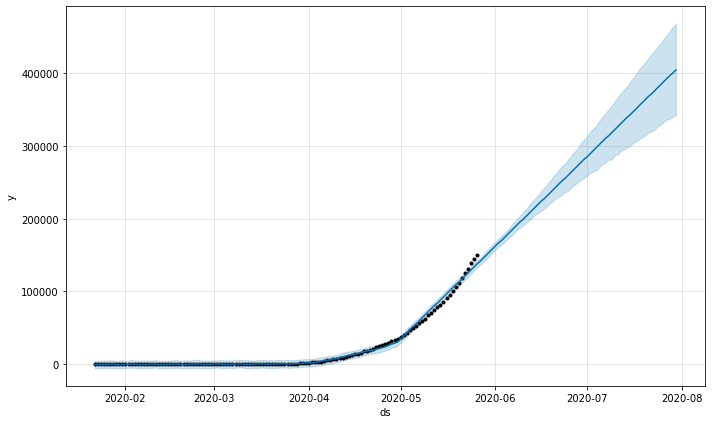

In [61]:
#lets plot the predicted model
confirmed_forecast_plot_India = m.plot(forecast_confirmed_India)

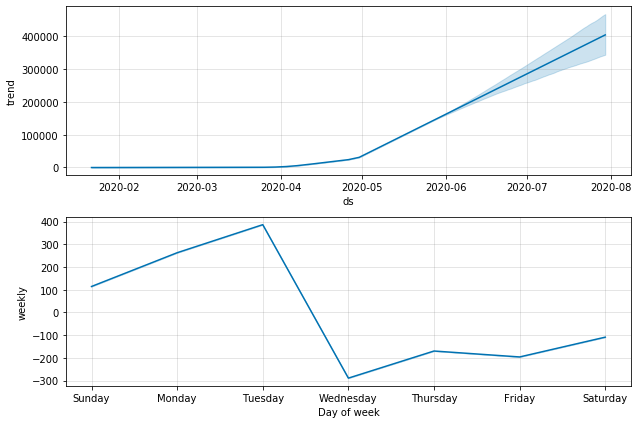

In [62]:
#lets print the components of the plot
confirmed_forecast_plot_India =m.plot_components(forecast_confirmed_India)

In [63]:
#Forecasting India COVID19 Deaths Cases
deaths_India.columns = ['ds','y']
deaths_India['ds'] = pd.to_datetime(deaths_India['ds'])
print(deaths_India.tail())
m = Prophet(interval_width=0.95)
m.fit(deaths_India)
future_deaths_India = m.make_future_dataframe(periods=65)
print(future_deaths_India.tail())

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds     y
121 2020-05-22  3726
122 2020-05-23  3868
123 2020-05-24  4024
124 2020-05-25  4172
125 2020-05-26  4344
            ds
186 2020-07-26
187 2020-07-27
188 2020-07-28
189 2020-07-29
190 2020-07-30


In [64]:
#predicting the future death acses with date, and upper and lower limit of y value
forecast_deaths_India = m.predict(future_deaths_India)
forecast_deaths_India[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
186,2020-07-26,11480.528505,9787.618777,13149.391247
187,2020-07-27,11604.212112,9875.796802,13310.106166
188,2020-07-28,11729.528707,9950.792833,13511.808603
189,2020-07-29,11840.251823,9990.709721,13635.551808
190,2020-07-30,11962.915541,10117.555660,13796.636094


In [83]:
print(forecast_deaths_India['yhat'].sum())
print(forecast_deaths_India['yhat_lower'].sum())
print(forecast_deaths_India['yhat_upper'].sum())

612245.709324145
553198.3326653877
670110.1458963392


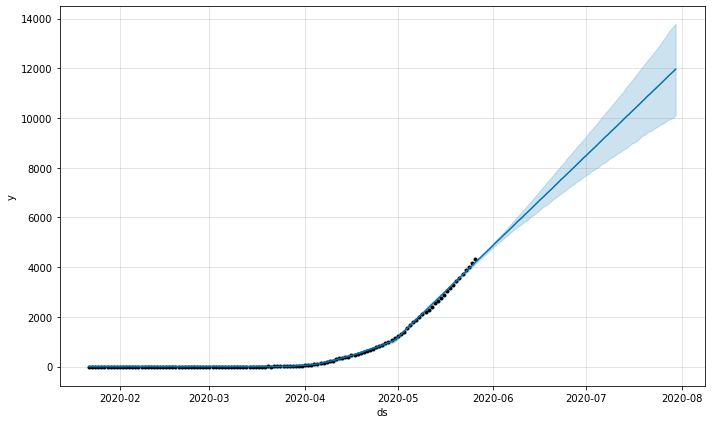

In [65]:
#lets plot the predicted model
deaths_forecast_plot_India = m.plot(forecast_deaths_India)

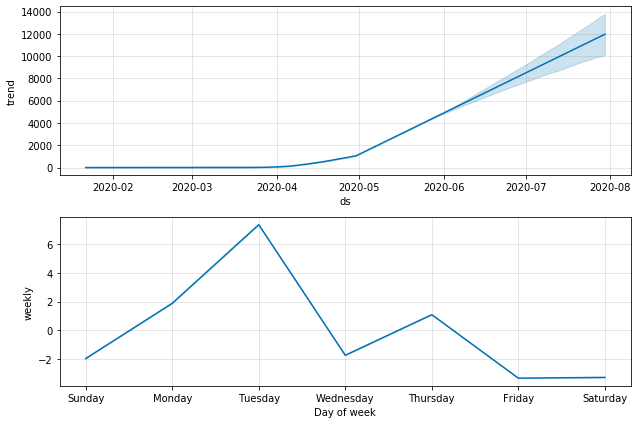

In [66]:
#lets print the components of the plot
deaths_forecast_plot_India =m.plot_components(forecast_deaths_India)

In [67]:
#Forecasting India COVID19 Recovered Cases
recovered_India.columns = ['ds','y']
recovered_India['ds'] = pd.to_datetime(recovered_India['ds'])
print(recovered_India.tail())
m = Prophet(interval_width=0.95)
m.fit(recovered_India)
future_recovered_India = m.make_future_dataframe(periods=65)
print(future_recovered_India.tail())

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds      y
121 2020-05-22  51824
122 2020-05-23  54385
123 2020-05-24  57692
124 2020-05-25  60706
125 2020-05-26  64277
            ds
186 2020-07-26
187 2020-07-27
188 2020-07-28
189 2020-07-29
190 2020-07-30


In [68]:
#predicting the future recovered acses with date, and upper and lower limit of y value
forecast_recovered_India = m.predict(future_recovered_India)
forecast_recovered_India[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
186,2020-07-26,169813.887318,142093.990458,195677.563374
187,2020-07-27,171724.555925,143147.539502,198667.648593
188,2020-07-28,173744.627090,145241.093778,200896.642567
189,2020-07-29,175173.972219,145153.353107,203669.409642
190,2020-07-30,177098.110166,145457.501813,205391.725444


In [84]:
print(forecast_recovered_India['yhat'].sum())
print(forecast_recovered_India['yhat_lower'].sum())
print(forecast_recovered_India['yhat_upper'].sum())

8530183.01435009
7192689.8339687465
9830702.045650017


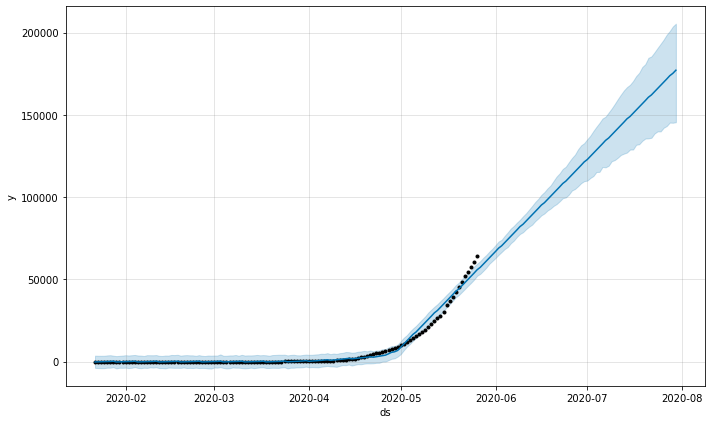

In [69]:
#lets plot the predicted model
recovered_forecast_plot_India = m.plot(forecast_recovered_India)

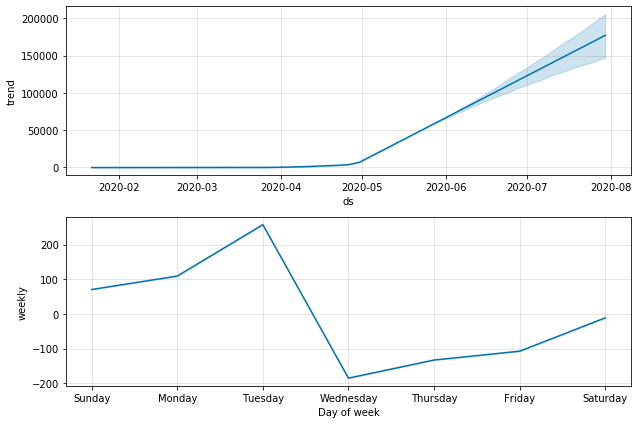

In [70]:
#lets print the components of the plot
recovered_forecast_plot_India =m.plot_components(forecast_recovered_India)

Conclusion:
    
As per data the Summary of India is:
India:Confirmed:2677040 Recovered: 903541 and Deaths:83979, So Death Rate=3% and Recovered Rate=34%
                
Now as per predicted data the summary of Covid19 cases of India (till end of July 2020) is:

India(lower value consideration):Confirmed:18058660,Recovered:7192689,Deaths:553198,So Death Rate=3% and Recovered Rate=40%

India(middle value consideration):Confirmed:20436638,Recovered:8530183,Deaths:612245,So Death Rate=2.9% and Recovered Rate=42%

India(upper value consideration):Confirmed:22938391,Recovered:9830702,Deaths:670110,So Death Rate=2.9% and Recovered Rate=43%                

So the predictions shows as the days ahead, we are proceeding towards better recovery rate.